# Linear Nonlinear Poisson (LNP) Encoding Model

The goal of this lab is for you to create a linear-nonlinear-Poisson encoding model. Your inputs will be the stimulus shown to the H1 neuron and the spike-triggered average (STA). You will then approximate the firing rate of the neuron via convolution, use the sigmoid function as a nonlinear decision function, and then create a non-homogenous Poisson process to generate spikes.

You will test how well your model does over the course of several runs. Let's break this down into parts. You may run the cell below to load in your data.

In [2]:
from scipy.io import loadmat
data = loadmat('H1.mat')
rho = data['rho']
stim = data['stim']
rho = rho.flatten()
stim = stim.flatten()

The first step is to create the spike-triggered average for the cell. You may use the code that you created in the previous lab for this step.

Text(0, 0.5, 'Stimulus intensity')

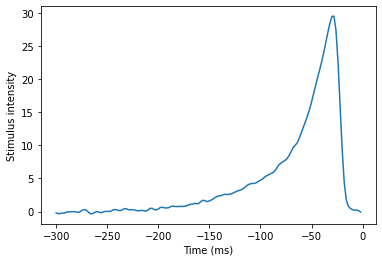

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# your code here
spikes, = np.where(rho==1)
spikes = spikes[spikes>150]

stimMat = np.zeros((len(spikes), 150))

for i in range(len(spikes)):
    stimMat[i,:] = stim[spikes[i]-150:spikes[i]]
    
STA = np.mean(stimMat, axis=0)
timeVector = np.arange(-300, 0, 2)

plt.figure()
plt.plot(timeVector, STA)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus intensity')

Next, you will want to create the linear approximation of the neuron's firing rate by convolving the spike-triggered average with the stimulus.

Plot the first 1000 datapoints of your resulting vector.

Text(0, 0.5, 'Approximated firing rate')

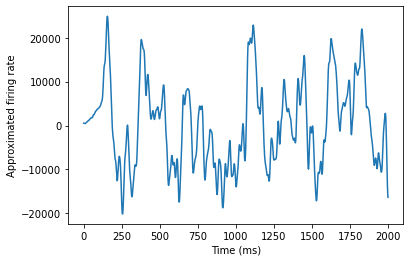

In [4]:
# your code here
approxFiring = np.convolve(stim, STA, 'same')

plt.figure()
plt.plot(np.arange(0, 2000, 2), approxFiring[0:1000])
plt.xlabel('Time (ms)')
plt.ylabel('Approximated firing rate')

Great! We have completed the linear portion of the model. Now, we need to use a nonlinearity to better model both the neuron's threshold and saturation values. Finish the function below to implement a sigmoid function.

$$x_{\sigma} = \frac{1}{1+e^{-x}} $$

In [5]:
# implement sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

We can see that the values from the approximated firing rate are pretty big. If we put them into the sigmoid directly, they would all become near 0 or near 1. In order to have a smoothly varying function, express the vector in terms of its z-score. You may do this by hand using the following formula, or use the built-in zscore() function from scipy.stats.

$$x_{norm} = \frac{x-\mu}{\sigma}$$

Where $\mu$ is the mean and $\sigma$ is the standard deviation.

In [6]:
# your code here
from scipy.stats import zscore

approxFiringNorm = zscore(approxFiring)

Use your sigmoid function on your z-scored approximation to create a vector that reprents the nonlinear firing response. Plot the first 1000 points of this vector. 

Text(0, 0.5, 'Nonlinear response')

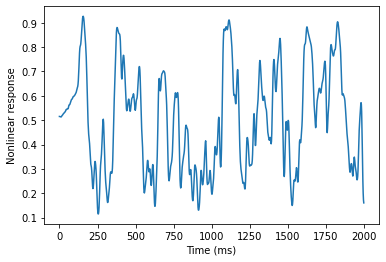

In [7]:
# your code here
nonlinearFiring = sigmoid(approxFiringNorm)

plt.figure()
plt.plot(np.arange(0, 2000, 2), nonlinearFiring[0:1000])
plt.xlabel('Time (ms)')
plt.ylabel('Nonlinear response')

Each value of the nonlinear firing rate approximation is now proportional to the probability that the neuron will fire in any time *t*. We now want to use this fact to have our model spike.

* First, compute the overall proportion of time bins in *rho* that contain spikes.
* Multiply this value by the nonlinear firing approximation to create a probability of firing for each time point.
* Using np.random.rand() implement a Poisson process based on this probability.

Your output should be a binary vector that is the same size as rho.

In [8]:
# your code here
propSpikes = sum(rho)/len(rho)

poisson = np.zeros(len(rho))

for i in range(len(poisson)):
    pFire = propSpikes * nonlinearFiring[i] * 2
    if np.random.rand() < pFire:
        poisson[i] = 1

print(sum(poisson)/len(poisson))

0.0892


Let's see how well our model does. Fill in the code below to create a plot the first 1000 points of the original spike train, rho, as well as your new vector, spikes. 

Text(0.5, 1.0, 'Model Spikes')

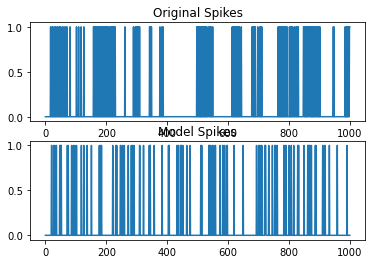

In [9]:
# compare to original rho
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.arange(1000), rho[0:1000])
plt.title('Original Spikes')
plt.subplot(2,1,2)
plt.plot(np.arange(1000), poisson[0:1000])
plt.title('Model Spikes')

There can be a good deal of randomness in this result from the Poisson process. Your plots are unlikely to look similar to your collaborators'. In order to see how well this model fits, we would like to compute a measure of its error. 

Loop through each item in your vectors, and count up the number of times your model disagrees with the ground truth. Express this as a proportion of errors by dividing by the length of the vector.

In [10]:
# your code here
disagreeCount = 0

for i in range(len(rho)):
    if rho[i] != poisson[i]:
        disagreeCount += 1

print(disagreeCount / len(rho))

0.15949166666666667


Let's now check how representative your result is.

In a loop, create a new Poisson-generated spike train 100 times. For each of these Poisson spike trains, compare them to *rho* using your error counting code above. Save each error level in a vector, and plot a histogram of errors over the 100 runs.

(array([ 4.,  3.,  9.,  9., 16., 19., 17., 13.,  7.,  3.]),
 array([0.15888   , 0.15905317, 0.15922633, 0.1593995 , 0.15957267,
        0.15974583, 0.159919  , 0.16009217, 0.16026533, 0.1604385 ,
        0.16061167]),
 <BarContainer object of 10 artists>)

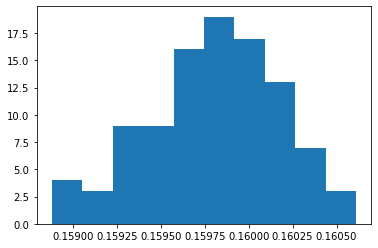

In [14]:
# your code here
errors = np.zeros(100)

for i in range(100):
    # create poisson spike train
    poisson = np.zeros(len(rho))
    
    for j in range(len(poisson)):
        pFire = propSpikes * nonlinearFiring[j] * 2
        if np.random.rand() < pFire:
            poisson[j] = 1
            
    # compute the error of this result
    disagreeCount = 0;
    for j in range(len(rho)):
        if rho[j] != poisson[j]:
            disagreeCount += 1
    
    errors[i] = disagreeCount / len(rho)
    
    
plt.figure()
plt.hist(errors)


How good is this model overall? Use your histogram to comment on the extent to which this type of encoder is good for this H1 neuron.

In [ ]:
# Answer:

Great work today! Please submit this notebook to Lyceum for grading.